In [7]:
#Generate data
import numpy as np

n = 100
synthetic_data = np.empty((n*n,3))

x = np.linspace(1,20,n)
y = np.linspace(1,20,n)

for i in range(n):
    for j in range(n):
        synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],0.5*(x[i]-10.0)**2-2*y[j]])


#Shuffle contents
np.random.shuffle(synthetic_data)

<IPython.core.display.Javascript object>


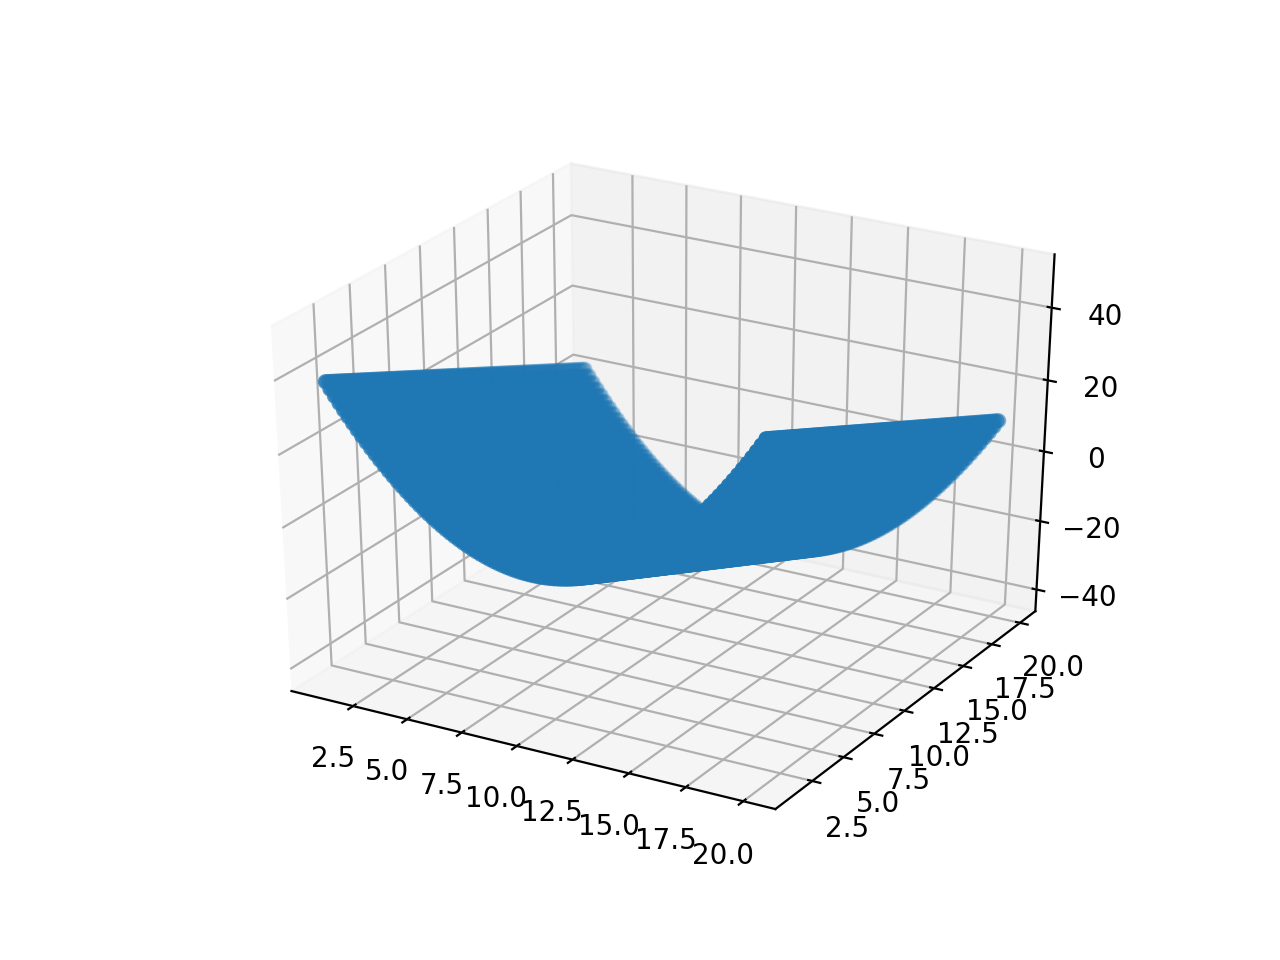

In [8]:
#Graph this data to be sure it is what we want
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_data[:,0], synthetic_data[:,1], synthetic_data[:,2])

In [3]:
#Helper functions
def normalise(x):
    """Convert values to range 0-1"""
    x_h = (x - x.min())*1.0 / (x.max() - x.min())
    
    return x_h, x.min(), x.max()

def un_normalise(x_h, x_min, x_max):
    """Convert values from range 0-1 back to normal"""
    x = (x_max-x_min)*x_h + x_min
    
    return x

In [19]:
#Prepare for PCA
mean_x = np.mean(synthetic_data[:,0])
mean_y = np.mean(synthetic_data[:,1])
mean_z = np.mean(synthetic_data[:,2])
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

#Scatter Matrix Generation
scatter_matrix = np.zeros((3,3))
for i in range(synthetic_data.shape[0]):
    scatter_matrix += (synthetic_data[i,:].reshape(3,1) - mean_vector).dot((synthetic_data[i,:].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

cov_mat = np.cov([synthetic_data[:,0],synthetic_data[:,1],synthetic_data[:,2]])
print('Covariance Matrix:\n', cov_mat)

print scatter_matrix/cov_mat

('Scatter Matrix:\n', array([[  3.06910774e+05,   2.00373051e-12,   1.53455387e+05],
       [  2.00373051e-12,   3.06910774e+05,  -6.13821549e+05],
       [  1.53455387e+05,  -6.13821549e+05,   3.18769004e+06]]))
('Covariance Matrix:\n', array([[  3.06941469e+01,  -2.45161760e-17,   1.53470734e+01],
       [ -2.45161760e-17,   3.06941469e+01,  -6.13882937e+01],
       [  1.53470734e+01,  -6.13882937e+01,   3.18800884e+02]]))
[[  9999.         -81730.95652174   9999.        ]
 [-81730.95652174   9999.           9999.        ]
 [  9999.           9999.           9999.        ]]


<IPython.core.display.Javascript object>


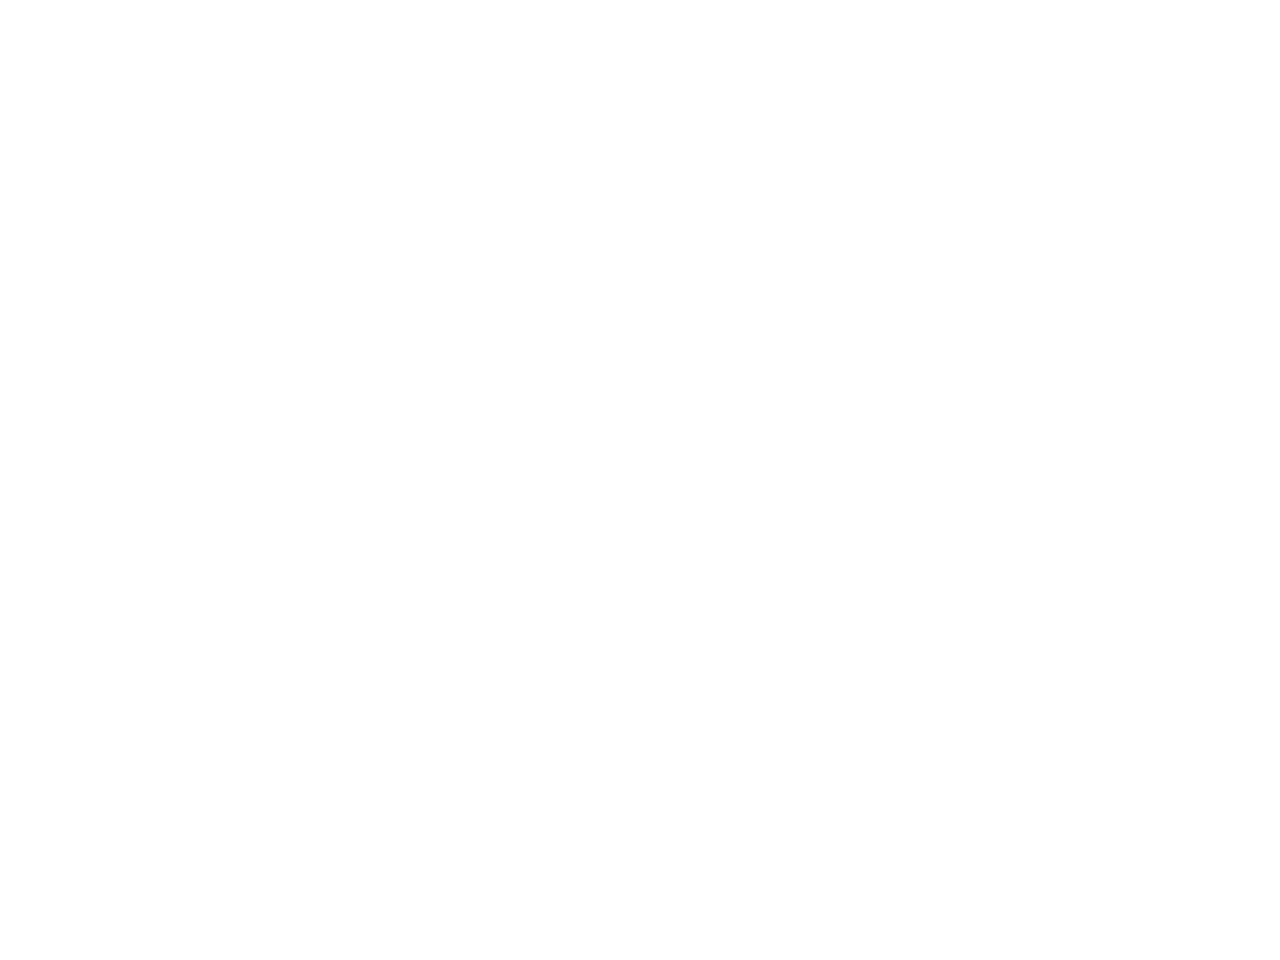

NameError: name 'reconstructed_data' is not defined

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], reconstructed_data[:,2])

In [ ]:
np.savetxt('reconstructed.csv', reconstructed_data, delimiter=",")
np.savetxt('synthetic.csv', synthetic_data, delimiter=",")